In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

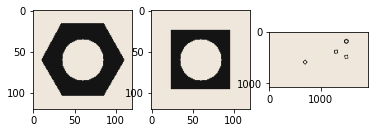

In [6]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))
plt.show()

In [9]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

In [20]:
def OtsuThresh(image):
    threshhold, binarized_image =  cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU,)
    return threshhold, binarized_image

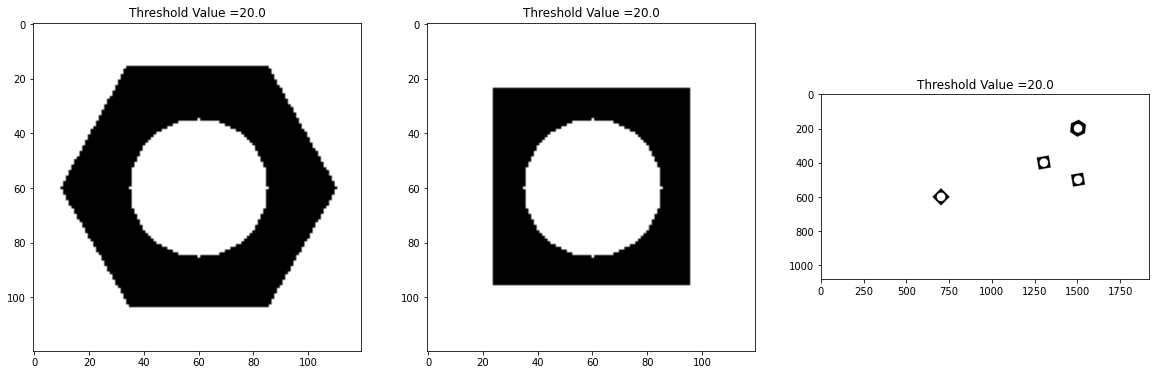

In [33]:
threshold_values = []
otsu_resulted_images = []
input_images = [hexnut_template_gray, squarenut_template_gray, conveyor_f100_gray]
fig, ax = plt. subplots(1,3, figsize = (20,20) )
for i in range(len(input_images)):
    threshold, otsuresult = OtsuThresh(input_images[i])
    threshold_values.append(threshold)
    ax[i].imshow(cv.cvtColor(otsuresult, cv.COLOR_BGR2RGB))
    ax[i].title.set_text("Threshold Value ="+ str(threshold))
    otsu_resulted_images.append(otsuresult)

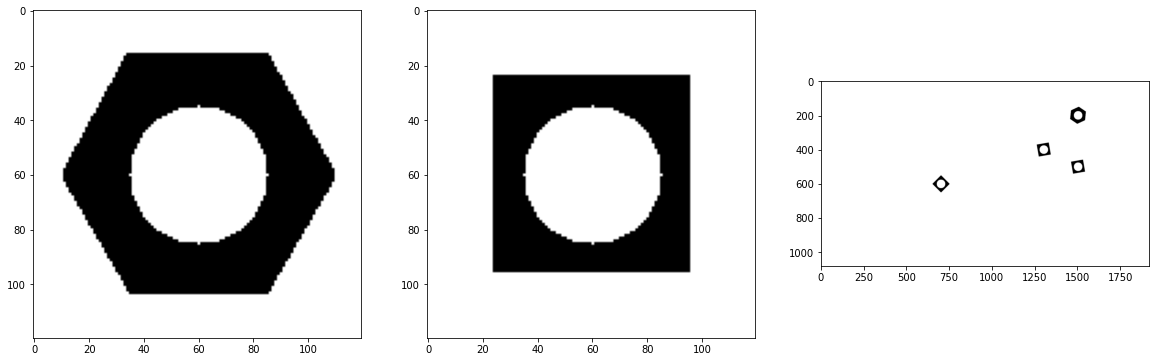

In [34]:
kernel = np.ones((3,3),np.uint8)
morphological_closing_results = []
fig, ax = plt. subplots(1,3, figsize = (20,20) )
for i in range(len(otsu_resulted_images)):
    closing_image = cv.morphologyEx(otsu_resulted_images[i], cv.MORPH_CLOSE, kernel)
    morphological_closing_results.append(closing_image)
    ax[i].imshow(cv.cvtColor(closing_image, cv.COLOR_BGR2RGB))

In [45]:
for i in range(len(morphological_closing_results)):
    output = cv.connectedComponentsWithStats(morphological_closing_results[i], 4, cv.CV_32S)
    print("Number of connected labels of image", i, "is", output[0],"\n")
    print("Statistics of image", i, "is\n", output[2], "\n")
    print("Centroids of image", i, "is\n", output[3], "\n")

Number of connected labels of image 0 is 3 

Statistics of image 0 is
 [[  11   16   99   88 4722]
 [   0    0  120  120 7717]
 [  35   35   51   51 1961]] 

Centroids of image 0 is
 [[59.83354511 59.22257518]
 [59.168848   59.54269794]
 [60.         60.        ]] 

Number of connected labels of image 1 is 3 

Statistics of image 1 is
 [[  24   24   72   72 3223]
 [   0    0  120  120 9216]
 [  35   35   51   51 1961]] 

Centroids of image 1 is
 [[59.19578033 59.19578033]
 [59.5        59.5       ]
 [60.         60.        ]] 

Number of connected labels of image 2 is 6 

Statistics of image 2 is
 [[    651     151     895     499   13930]
 [      0       0    1920    1080 2051826]
 [   1475     175      51      51    1961]
 [   1275     375      51      51    1961]
 [   1475     475      51      51    1961]
 [    675     575      51      51    1961]] 

Centroids of image 2 is
 [[1275.02110553  400.11083991]
 [ 956.24734066  540.88404962]
 [1500.          200.        ]
 [1300.         